In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 웹캠에 접근
- VideoCapture: 0이면 첫번째 카메라에 접근하라
- cap.read() 에서 ret = boolean

In [2]:
cap = cv2.VideoCapture('img/car-overhead-1.avi') # 0은 카메라 설치 되있어야함

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError('Cannot open webcam')
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame,None,fx=0.5,fy=0.5,interpolation = cv2.INTER_AREA) # 크기 줄이기
    cv2.imshow('input',frame)
    
    c=cv2.waitKey(1)
    if c == 27: # ESC key
        break
cap.release() # oepn한 캡쳐 객체 해제
cv2.destroyAllWindows() # 윈도우 닫기

 - 여러개의 웹캠을 이용할 때에는 비디오 캡쳐의 인덱스 값을 늘린다.
    - cap= cv2.VideoCapture(1+cv2.CAP_QT)

# KEYBOARD 와 연동
- 코드에선 아스키값으로 받아야함

In [3]:
def print_howto(): 
    print("""
        Change color space of the
        input video stream using keyboard controls. The control keys are: 
            1. Grayscale - press 'g'
            2. YUV - press 'y'
            3. HSV - press 'h'
    """)
if __name__ == '__main__':
    print_howto()
    cap = cv2.VideoCapture('img/car-overhead-1.avi')
    if not cap.isOpened():
        raise IOError('Cannot open webcam')
    cur_mode = None
    while True:
        ret,frame = cap.read()
        frame = cv2.resize(frame,None,fx=0.5,fy=0.5,interpolation = cv2.INTER_AREA)
        c=cv2.waitKey(1)
        if c == 27: # esc 누르면 꺼지고
            break        
        if c!=-1 and c!=255 and c != cur_mode: # 키보드에서 누른 값을 cur_mode로 받는다
            cur_mode=c
        if cur_mode == ord('g'): # g를 누르면
            output = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)  # gray 반환
        elif cur_mode == ord('y'):
            output = cv2.cvtColor(frame,cv2.COLOR_BGR2YUV)  # yuv 반환
        elif cur_mode == ord('h'):
            output = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV) # huv - 색상 채도 진하기
        else:
            output = frame
        cv2.imshow('car',output)
cap.release()
cv2.destroyAllWindows()


        Change color space of the
        input video stream using keyboard controls. The control keys are: 
            1. Grayscale - press 'g'
            2. YUV - press 'y'
            3. HSV - press 'h'
    


# 마우스와 상호작용

In [9]:
def detect_quadrant(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if x>width/2:
            if y>height/2:
                point_top_left = (int(width/2),int(height/2))
                point_bottom_right = (width-1,height-1)
            else:
                point_top_left = (int(width/2),0)
                point_bottom_right = (width-1,int(height/2))
        else:
            if y>height/2:
                point_top_left = (0,int(height/2))
                point_bottom_right = (int(width/2),height-1)
            else:
                point_top_left = (0,0)
                point_bottom_right = (int(width/2),int(height/2))
        img = param['img']
        # Repaint all in white again
        cv2.rectangle(img,(0,0),(width-1,height-1),(255,255,255),-1) 
        # paint green quadrant
        cv2.rectangle(img,point_top_left,point_bottom_right,(0,100,0),-1) # BGR
if __name__ == '__main__':
    width,height = 640,480 # 임의의 크기 지정
    img = 255*np.ones((height,width,3),dtype=np.uint8) # uint8 = 양수만 표현 가능
    cv2.namedWindow('Input window')
    cv2.setMouseCallback('Input window',detect_quadrant,{'img':img}) # 마우스 이벤트가 탐지되었을 때 (클릭) 사각형 보여짐
    
    while True:
        cv2.imshow('input window',img)
        c=cv2.waitKey(1)
        if c==27:
            break
cv2.destroyAllWindows()

In [11]:
print([x for x in dir(cv2) if x.startswith('EVENT')]) # kind of event

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


# 비디오 스트림과 상호작용
- 음화 필름 효과

In [2]:
def update_pts(params,x,y): # point 변경
    global x_init,y_init # 전역변수 생성
    params['top_left_pt'] = (min(x_init,x),min(y_init,y))
    params['bottom_right_pt'] = (max(x_init,x),max(y_init,y))
    img[y_init:y,x_init:x] = 255-img[y_init:y,x_init:x]
def draw_rectangle(event,x,y,flags,params):
    global x_init,y_init,drawing
    # First click initialize the init rectangle point
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스를 누른 상태면
        drawing = True
        x_init,y_init = x,y
    # 마우스 버튼을 누른 상태에서 대각선 직사각형 지점을 업데이트
    elif event == cv2.EVENT_MOUSEMOVE and drawing: # 마우스 이동하고 누른 상태면
        update_pts(params,x,y)
    elif event == cv2.EVENT_LBUTTONUP: # 마우스를 떼면
        drawing = False
        update_pts(params,x,y)
if __name__ == '__main__':
    drawing=False
    event_params = {'top_left_pt':(-1,-1),'bottom_right_pt':(-1,-1)}
    
    cap = cv2.VideoCapture('img/car-overhead-1.avi')
    
    if not cap.isOpened():
        raise IOError('Cannot open webcam')
    cv2.namedWindow('Webcam')
    cv2.setMouseCallback('Webcam',draw_rectangle,event_params)
    
    while True:
        ret,frame = cap.read()
        img = cv2.resize(frame,None, fx = 0.5, fy = 0.5,interpolation = cv2.INTER_AREA)
        (x0,y0),(x1,y1) = event_params['top_left_pt'],event_params['bottom_right_pt']
        img[y0:y1,x0:x1] = 255 - img[y0:y1,x0:x1] # 음화효과
        cv2.imshow('webcam',img)
        
        c=cv2.waitKey(1)
        if c== 27:
            break
    cap.release()
    cv2.destroyAllWindows()

# Cartoonization

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- MedianBlur : salt and pepper noise를 제거하는데 우수
    - salt and pepper noise란 소금이나 후추처럼 점이 뿌려져 있는 것(임펄스 잡음)

In [3]:
def print_howto(): 
    print("""
        Change cartoonizing mode of image:
            1. Cartoonize without Color - press 's'
            2. Cartoonize with Color - press 'c'
    """)
def cartoonize_image(img,ksize=5,sketch_mode = False):
    num_repetitions,sigma_color,sigma_space,ds_factor = 10,5, 7, 4
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # grayscale
    img_gray = cv2.medianBlur(img_gray,7) # blurring -> salt and pepper noise 제거 우수
    edges = cv2.Laplacian(img_gray,cv2.CV_8U,ksize = ksize) # edge detection
    ret,mask = cv2.threshold(edges,100,255,cv2.THRESH_BINARY_INV) # detect edge in the image and threshold it
    # --> 흑백화
#     'mask' is the sketch of the image
    if sketch_mode:
        return cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
    # Resize the image to a smaller size for faster compution
    img_small = cv2.resize(img, None, fx=1.0/ds_factor, fy=1.0/ds_factor, interpolation=cv2.INTER_AREA)
    for i in range(num_repetitions): # apply bilateral filter the image multiple times
        img_small = cv2.bilateralFilter(img_small,ksize,sigma_color,sigma_space)
    img_output = cv2.resize(img_small, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_LINEAR)
    dst = np.zeros(img_gray.shape)
    # add the thick boundary lines to the image using 'AND' operator
    dst = cv2.bitwise_and(img_output,img_output,mask=mask)
    return dst

if __name__ == '__main__':
    print_howto()
    cap = cv2.VideoCapture('img/car-overhead-1.avi')
    cur_mode = None
    while True:
        ret,frame = cap.read()
        frame = cv2.resize(frame,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
        
        c=cv2.waitKey(1)
        if c == 27:
            break
        if c!= -1 and c!= 255 and c!= cur_mode:
            cur_mode = c
        if c == ord('s'):
            cv2.imshow('Cartoonize',cartoonize_image(frame,ksize=5,sketch_mode = True))
        elif cur_mode == ord('c'):
            cv2.imshow('Cartoonize',cartoonize_image(frame,ksize=5,sketch_mode=False))
        else:
            cv2.imshow('Cartoonize',frame)
    cap.release()
    cv2.destroyAllWindows()


        Change cartoonizing mode of image:
            1. Cartoonize without Color - press 's'
            2. Cartoonize with Color - press 'c'
    


## 두꺼운 라인으로 변환
- cv2.erode를 하는 이유: 객체가 검정이고 배경이 흰색이기 때문에 그 반대가 되어야 함
- erode와 diation은 흰색을 객체, 검정을 배경으로 취급하기 때문

In [3]:
# 두꺼운 라인 하기
def print_howto(): 
    print("""
        Change cartoonizing mode of image:
            1. Cartoonize without Color - press 's'
            2. Cartoonize with Color - press 'c'
    """)
def cartoonize_image(img,ksize=5,sketch_mode = False):
    num_repetitions,sigma_color,sigma_space,ds_factor = 10,5, 7, 4
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # grayscale
    img_gray = cv2.medianBlur(img_gray,7) # blurring -> salt and pepper noise 제거 우수
    edges = cv2.Laplacian(img_gray,cv2.CV_8U,ksize = ksize) # edge detection
    ret,mask = cv2.threshold(edges,100,255,cv2.THRESH_BINARY_INV) # detect edge in the image and threshold it
    # --> 흑백화
#     'mask' is the sketch of the image
    if sketch_mode:
        img_sketch = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
        kernel = np.ones((3,3),np.uint8)
        img_eroded = cv2.erode(img_sketch,kernel,iterations=1) # 침식
        return cv2.medianBlur(img_eroded,ksize=5)
    # Resize the image to a smaller size for faster compution
    img_small = cv2.resize(img, None, fx=1.0/ds_factor, fy=1.0/ds_factor, interpolation=cv2.INTER_AREA)
    for i in range(num_repetitions): # apply bilateral filter the image multiple times
        img_small = cv2.bilateralFilter(img_small,ksize,sigma_color,sigma_space)
    img_output = cv2.resize(img_small, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_LINEAR)
    dst = np.zeros(img_gray.shape)
    # add the thick boundary lines to the image using 'AND' operator
    dst = cv2.bitwise_and(img_output,img_output,mask=mask)
    return dst

if __name__ == '__main__':
    print_howto()
    cap = cv2.VideoCapture('img/car-overhead-1.avi')
    cur_mode = None
    while True:
        ret,frame = cap.read()
        frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        
        c=cv2.waitKey(1)
        if c == 27:
            break
        if c!= -1 and c!= 255 and c!= cur_mode:
            cur_mode = c
        if c == ord('s'):
            cv2.imshow('Cartoonize',cartoonize_image(frame,ksize=5,sketch_mode = True))
        elif cur_mode == ord('c'):
            cv2.imshow('Cartoonize',cartoonize_image(frame,ksize=5,sketch_mode=False))
        else:
            cv2.imshow('Cartoonize',frame)
    cap.release()
    cv2.destroyAllWindows()


        Change cartoonizing mode of image:
            1. Cartoonize without Color - press 's'
            2. Cartoonize with Color - press 'c'
    


# Gaussian filter & bilateral Filter
- Gaussian Filter = 모든 것을 부드럽게 만듦
- Bilateral Filter(양방향성 필터) = 영상이 부드럽고 엣지는 보기 좋고 날카롭다

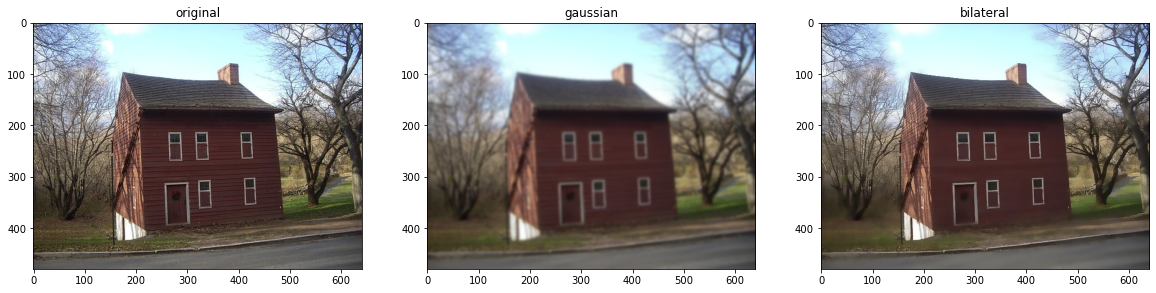

In [21]:
img = cv2.imread('img/house.jpg')
img_gaussian = cv2.GaussianBlur(img,(13,13),0) # Gaussian Kernel size : 13x13
img_bilateral = cv2.bilateralFilter(img,13,70,50) # ksize*ksize = 13*13
fig,axes = plt.subplots(1,3,figsize=(20,12))
axes[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axes[0].set(title = 'original')
axes[1].imshow(cv2.cvtColor(img_gaussian,cv2.COLOR_BGR2RGB))
axes[1].set(title = 'gaussian')
axes[2].imshow(cv2.cvtColor(img_bilateral,cv2.COLOR_BGR2RGB))
axes[2].set(title = 'bilateral')
plt.show()